<a href="https://colab.research.google.com/github/RigoArias/MetodosComputacionales_RigoArias_DarcyGaleano/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error estimado: 0.03552550207802968
Error teórico: 0.0466244537830583


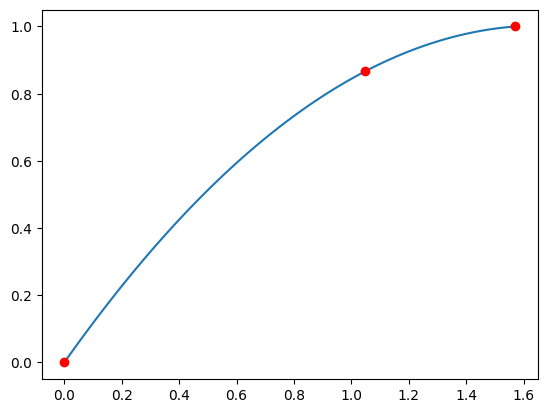

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import math


x0 = 0
x1 = np.pi / 3
x2 = np.pi / 2
f_x0 = np.sin(x0)
f_x1 = np.sin(x1)
f_x2 = np.sin(x2)

# a. Plot conjunto soporte
# b. Polinomio interpolador

x = sym.symbols('x')
L0 = ((x - x1) * (x - x2)) / ((x0 - x1) * (x0 - x2))
L1 = ((x - x0) * (x - x2)) / ((x1 - x0) * (x1 - x2))
L2 = ((x - x0) * (x - x1)) / ((x2 - x0) * (x2 - x1))

f = L0 * f_x0 + L1 * f_x1 + L2 * f_x2
f_simplified = sym.simplify(f)
f_lambdified = sym.lambdify(x, f_simplified)
x_vals = np.linspace(0, np.pi / 2, 100)
f_vals = f_lambdified(x_vals)

plt.plot(x_vals, f_vals)
plt.plot(x0, f_x0, 'ro')
plt.plot(x1, f_x1, 'ro')
plt.plot(x2, f_x2, 'ro')

# c.  estimar sin(pi/8)

x_estimate = np.pi / 8
f_estimate = f_lambdified(x_estimate)

# d. caluclo de error

true_value = np.sin(x_estimate)
error_estimate = abs(true_value - f_estimate)

# e. comparacion de error

f_sym = sym.sin(x)
f_deriv_3 = sym.diff(f_sym, x, 3)
diff_product = (x - x0) * (x - x1) * (x - x2)
factorial = math.factorial(3)
xi = np.pi/8  # xi value #
f_deriv_3_evaluate = f_deriv_3.subs(x, xi)
error_theoretical = abs(f_deriv_3_evaluate / factorial) * diff_product.subs(x, x_estimate)

print("Error estimado:", error_estimate)
print("Error teórico:", error_theoretical)

# El error teorico se aleja del valor estimado, pues pi/8 es un mal punto de escongencia para iniciar a definir el error

In [67]:
def polimonio_laguerre(n):
  x= sym.symbols('x')
  base= sym.exp(-x) * x**n
  derivada= sym.diff(base,x,n)
  l= sym.exp(x)/sym.factorial(n)
  p_l= derivada * l

  return p_l

for i in range(1,6):
  polinomios= polimonio_laguerre(i)
  roots = sym.solveset(polinomios, sym.symbols('x'), domain=sym.S.Reals)
  print(f"Raíces de L_{i}(x): {roots}")


Raíces de L_1(x): {1}
Raíces de L_2(x): {2 - sqrt(2), sqrt(2) + 2}
Raíces de L_3(x): Intersection({3 + 2*sqrt(3)*cos(atan(sqrt(2))/3), -sqrt(3)*cos(atan(sqrt(2))/3)/2 + 3*re(1/((-1/2 - sqrt(3)*I/2)*(3 + 3*sqrt(2)*I)**(1/3))) + 3*sin(atan(sqrt(2))/3)/2 + 3 + I*(-3*cos(atan(sqrt(2))/3)/2 - sqrt(3)*sin(atan(sqrt(2))/3)/2 + 3*im(1/((-1/2 - sqrt(3)*I/2)*(3 + 3*sqrt(2)*I)**(1/3)))), 3*re(1/((-1/2 + sqrt(3)*I/2)*(3 + 3*sqrt(2)*I)**(1/3))) - sqrt(3)*cos(atan(sqrt(2))/3)/2 - 3*sin(atan(sqrt(2))/3)/2 + 3 + I*(3*im(1/((-1/2 + sqrt(3)*I/2)*(3 + 3*sqrt(2)*I)**(1/3))) - sqrt(3)*sin(atan(sqrt(2))/3)/2 + 3*cos(atan(sqrt(2))/3)/2)}, Reals)
Raíces de L_4(x): Intersection({4 - sqrt(16 + 48/(96 + 48*sqrt(2)*I)**(1/3) + 2*(96 + 48*sqrt(2)*I)**(1/3))/2 - sqrt(32 - 2*(96 + 48*sqrt(2)*I)**(1/3) - 64/sqrt(16 + 48/(96 + 48*sqrt(2)*I)**(1/3) + 2*(96 + 48*sqrt(2)*I)**(1/3)) - 48/(96 + 48*sqrt(2)*I)**(1/3))/2, 4 + sqrt(16 + 48/(96 + 48*sqrt(2)*I)**(1/3) + 2*(96 + 48*sqrt(2)*I)**(1/3))/2 - sqrt(32 - 2*(96 + 48*sqrt

0.31690575638321106
Factor 1: 0.7518796992481203
Factor 2: 0.7518796992481203
Los factores son iguales.


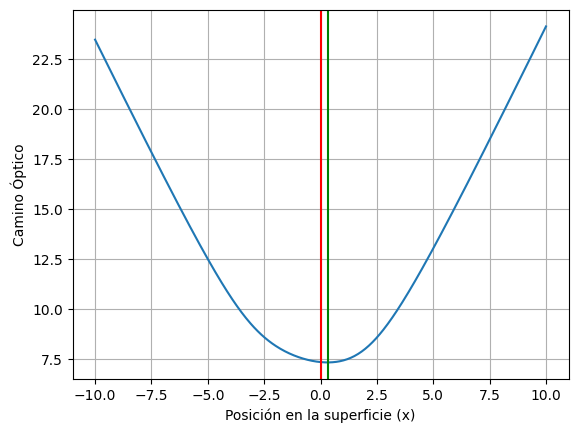

In [68]:
def camino_optico(x, T, R, n0, n1):
    ct1 = n0 * np.sqrt((x - T[0])**2 + T[1]**2)
    ct2 = n1 * np.sqrt((x - R[0])**2 + R[1]**2)
    return ct1 + ct2

T = [-3, 2]
R = [2, -2]
n0 = 1
n1 = 1.33

x_values = np.linspace(-10, 10, 100)

ct_values = camino_optico(x_values, T, R, n0, n1)

def Derivative(f,x,h=1e-4):
  return (f(x+h)-f(x-h))/(2*h)
def Derivative2(f,x,h=1e-4):
  return (f(x+h)-2*f(x)+f(x-h))/(h**2)

def GetNewtonMethod(f,xn,itmax=100,precision=1e-9):

  error = 1
  it = 0
  while error > precision and it < itmax:
    try:
      xn1 = xn - Derivative(f,xn)/Derivative2(f,xn)
      error = np.abs(Derivative(f,xn)/Derivative2(f,xn))
    except ZeroDivisionError:
      print('Division by zero error')
    xn = xn1
    it += 1
  if it == itmax:
    return False
  else:
    return xn


f_optico = lambda x: camino_optico(x, T, R, n0, n1)

x_inicial = 0
x_min = GetNewtonMethod(f_optico, x_inicial)

x_values = np.linspace(-10, 10, 500)
camino_values = camino_optico(x_values, T, R, n0, n1)

plt.plot(x_values, camino_values, label='Camino Óptico')
plt.axvline(x=x_min, color='g')
plt.axvline(x=0, color='r')
plt.xlabel('Posición en la superficie (x)')
plt.ylabel('Camino Óptico')
plt.grid(True)
print(x_min)

def alfa_0():
  return np.arctan(-2/(x_min+3))

def alfa_1():
    sin_alpha0 = np.sin(alfa_0())
    sin_alpha1 = (n0 * sin_alpha0) / n1
    return np.arcsin(sin_alpha1)

factor_1 = n0 / n1
factor_2 = np.sin(alfa_1()) / np.sin(alfa_0())

print(f"Factor 1: {factor_1}")
print(f"Factor 2: {factor_2}")

if factor_1 == factor_2:
    print("Los factores son iguales.")
else:
    print("Los factores son diferentes.")
